I am always interested in building different ML models to predict house prices, In this blog, i will be using deep learning framework to build the neural network model to predict the house prices. This is common machine learning problem as we are trying to predict continuous value and commonly known as Regression.

Neural Network revolves around four fundamentals.

Layers:are fundamenta data sttructure and building block of neural network

The Input Data;data used to build the model and corresponding targets

The Loss Function:are feedback signals used for learning. The quantity that will be minimized during training and represents measure of success for the task in hand

The Optimizer; are used to determine how learning goes through. It determines how the network will be updated based on the loss function
    

We will be using keeras deep learning framework for Python to train our deep learning model.

In this blog, we will use famous Boston Housing dataset to predict median price of home in a given Boston suburb. The dataset comes from mid-1970s and includes information such as crime rate, property tax and others. The dataset is already loaded in keras library. The focus of this blog will be on building deep learning model rather than descriptive analysis of the data. this is pretty small dataset with 506 instances, split between 404 training samples and 102 test samples. Other thing about data is the features are in different scales and take take different values. For example, some feature take value 0 or 1 whereas some feature take value between 0 to 100 and so on.

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [4]:
#### Lets look at the data
train_data.shape

(404, 13)

In [5]:
train_targets.shape

(404,)

In [7]:
test_data.shape

(102, 13)

We see that there are 404 training instances with 13 numeric feature in train data and 102 instances with 13 numeric feature in test data.

In [9]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

Our goal is to predict the median values of homes. Train targets represents median value of homes in thousands of dollar (000s)

#### Preparing the data for Neural Network

Here we will standardize all the features as we know that different features are in different scales. It is very important to convert all the features into same scales before training the neural network. The technique we will use is called feature wise normalization where for each feature in input data, we substract the mea of the feature and divide by standard deviation so that feature is centred around 0 and has a unit standard deviation.

In [10]:
mean= train_data.mean(axis=0)
train_data -= mean
std= train_data.std(axis=0)
train_data /=std

test_data -=mean
test_data /=std

We should always use the quantities computed using training data to normalize the test data and sould never use any quantities computed on test data.

### Building the Network

We will be using small network with two hidden layers, each with 64 units to build the network as our training data is very small which increases the probabilty of overfitting. Using a small network is one of few ways to mitigate this risk.

In [11]:
from keras import models
from keras import layers

def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                          input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Using TensorFlow backend.


#### Model validation using k fold cross validation

One reson to use k fold cross validation instead of creating validation sets is our data is prettu small.

In [13]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [14]:
all_scores

[2.1980979442596436,
 2.1075119972229004,
 2.8739125728607178,
 2.4534425735473633]

In [15]:
np.mean(all_scores)

2.4082412719726562

It tells us that average house price is off by $2400 on average. Can we do better than this by training our model for little longer.

In [16]:
from keras import backend as K

# some memory clean up
K.clear_session()


In [18]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #%d' % i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


Lets calculate average of the per epoch MAE scores for all the folds

In [19]:
average_mae_history =[
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

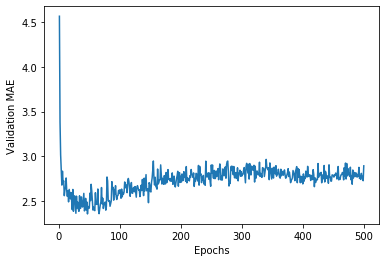

In [22]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Its hard to understand the plot due to firts few data points which are in very different scales. So, lets remove them and replace each point with an exponential moving average of the previous points to obtain smooth curve

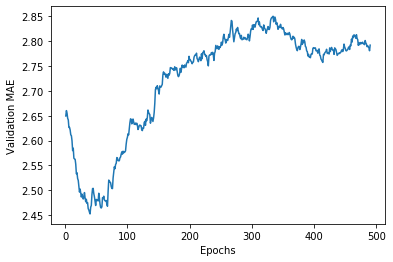

In [25]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()
    

The plot clearly shows validation MAE stops improving after 80 epochs as model starts overfitting after that.

##### Change the model epoch and apply it on test sets

In [26]:
model= build_model()

# Train it on entire train sets and apply the model on test sets
model.fit(train_data, train_targets,
         epochs=80, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 108us/step


In [27]:
test_mae_score

2.892139196395874

In [28]:
test_mse_score

18.16316537296071

The final model is off by around $2800.